In [228]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [229]:
data = pd.read_csv('datasets/linear_regression_data.csv')
data = data.rename(columns={"deneyim": "x", "maas": "y"})

In [230]:
data.head

<bound method NDFrame.head of        x      y
0    0.5   2500
1    0.0   2250
2    1.0   2750
3    5.0   8000
4    8.0   9000
5    4.0   6900
6   15.0  20000
7    7.0   8500
8    3.0   6000
9    2.0   3500
10  12.0  15000
11  10.0  13000
12  14.0  18000
13   6.0   7500>

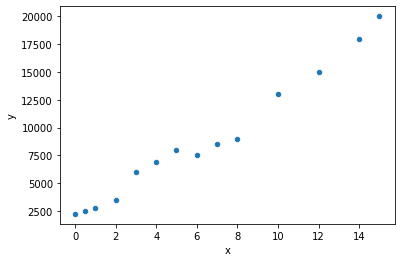

In [231]:
data.plot(kind='scatter', x='x', y='y')
plt.show()

In [232]:
x = data['x']
y = data['y']*0.1

x = np.c_[np.ones(x.shape[0]), x] 

In [233]:
gamma = 0.001 #Step size
iterations = 20000 #Number of iterations
m = y.size #Number of data points
beta = np.random.rand(2) #Pick some random values to start with


#GRADIENT DESCENT
def gradient_descent(x, y, beta, iterations, gamma):
    past_costs = []
    past_betas = [beta]
    for i in range(iterations):
        prediction = np.dot(x, beta)
        error = prediction - y
        cost = 1/(2*m) * np.dot(error.T, error)
        past_costs.append(cost)
        beta = beta - (gamma * (1/m) * np.dot(x.T, error))
        past_betas.append(beta)
        
    return past_betas, past_costs

#Pass the relevant variables to the function and get the new values back...
past_betas, past_costs = gradient_descent(x, y, beta, iterations, gamma)
beta = past_betas[-1]

#Print the results
print("Gradient Descent: {:.2f}, {:.2f}".format(beta[0], beta[1]))

Gradient Descent: 166.29, 113.84


In [234]:
#Get error
error = 0
for idx,i in enumerate(x[:,1]):
    error += abs(beta[0]+beta[1]*i - y[idx])
error *= 1/y.size
print(error)

68.02155790993865


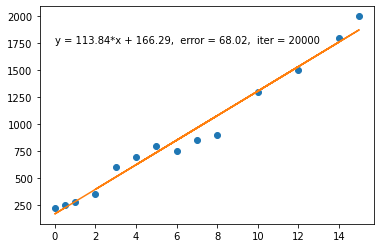

In [235]:
#Plot the regression line
plt.plot(x[:,1], y, 'o')
plt.plot(x[:,1], beta[0]+beta[1]*x[:,1])
plt.text(0,1750,'y = {:.2f}*x + {:.2f},  error = {:.2f},  iter = {}'.format(beta[1], beta[0], error, iterations))
plt.show()

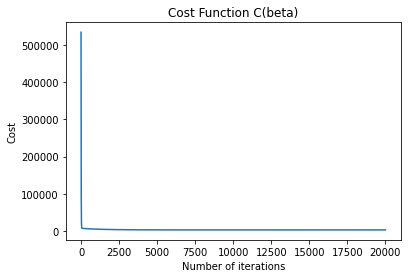

In [236]:
#Plot the cost function...
plt.title('Cost Function C(beta)')
plt.xlabel('Number of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()